
# Walkability Index EDA 
TODO:  Another title?  This is just a working title for now

This notebook analyzes walkability scores across U.S. Census block groups to identify areas where walkability changes dramatically between adjacent neighborhoods. These insights may inform city planning or infrastructure investment.

TODO:  Add more polished content here 

---

### 📦 Required Packages

This notebook uses the following libraries:

- `pandas`
- `matplotlib`
- `seaborn`
- `geopandas`
- `shapely`

Please install them with:

```bash
pip install pandas matplotlib seaborn geopandas shapely
```


# Walkability Index EDA

Exploring disparities in walkability across neighboring Census block groups to identify spatial gaps that may inform urban planning decisions.

In [1]:
import pandas as pd

# Load the dataset
# df = pd.read_csv("100count.csv")
df = pd.read_csv("EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")
df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


## Step 1: Data Preview
Take a look at the key columns in the dataset to understand the structure.

## Step 2: Identify Walkability Gaps Between Neighbors


### Calculating Walkability Gaps

To find where walkability shifts, calculate the difference in walkability index between each block group and the next one in the same tract. This gives us a `Walkability_Gap` column, which we use to identify hotspots.


In [2]:
# Sort by tract and block group to simulate proximity
walk_df = df[['GEOID10', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'NatWalkInd']].copy()
walk_df = walk_df.sort_values(by=['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE'])

# Compute differences
walk_df['Next_NatWalkInd'] = walk_df['NatWalkInd'].shift(-1)
walk_df['Next_GEOID10'] = walk_df['GEOID10'].shift(-1)
walk_df['Walkability_Gap'] = abs(walk_df['NatWalkInd'] - walk_df['Next_NatWalkInd'])

# Flag if in same tract
walk_df['Same_Tract'] = walk_df['TRACTCE'] == walk_df['TRACTCE'].shift(-1)

# Filter large gaps
gaps_df = walk_df[walk_df['Same_Tract'] & (walk_df['Walkability_Gap'] > 5)]
gaps_df.head()

,GEOID10,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NatWalkInd,Next_NatWalkInd,Next_GEOID10,Walkability_Gap,Same_Tract
22527,1.005951e+10,1,5,950600,1,11.000000,2.666667,1.005951e+10,8.333333,True
23252,1.007010e+10,1,7,10002,2,2.666667,7.833333,1.007010e+10,5.166667,True
23746,1.013953e+10,1,13,953200,1,1.833333,7.500000,1.013953e+10,5.666667,True
22681,1.015001e+10,1,15,1201,1,6.333333,13.000000,1.015001e+10,6.666667,True
23510,1.015002e+10,1,15,1600,3,9.000000,3.666667,1.015002e+10,5.333333,True


## Step 3: Visualize Walkability Gaps with Histogram

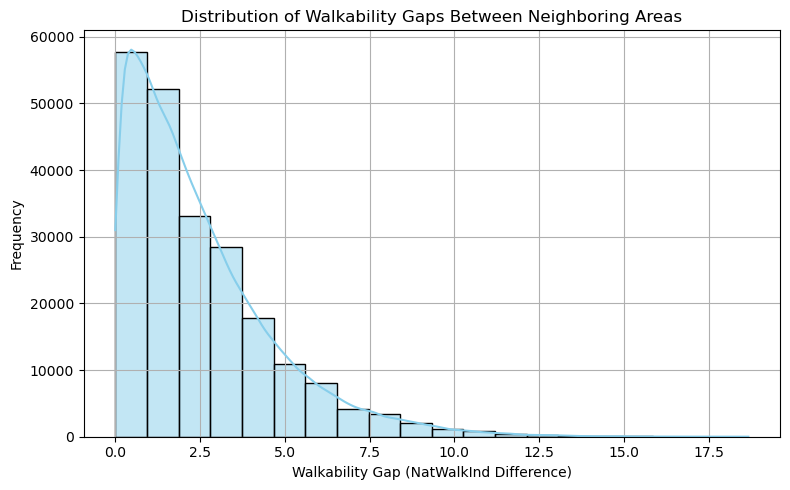

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(walk_df['Walkability_Gap'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Walkability Gaps Between Neighboring Areas")
plt.xlabel("Walkability Gap (NatWalkInd Difference)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### Understanding the Histogram: Walkability Gaps Between Neighbors

This histogram shows **how common different sizes of walkability gaps are** between neighboring Census block groups within the same tract.

- The **x-axis** represents the **difference in walkability scores** (`NatWalkInd`) between adjacent block groups.
- The **y-axis** shows **how many times** that size of gap appears in the dataset.

#### How to interpret:
- A **tall bar near 0–2** means most block groups have **similar walkability scores**.
- A **few bars farther out (e.g., gaps >5)** represent areas where walkability **changes sharply**, which may signal **physical or infrastructural barriers**.

These large-gap areas are potential candidates for **urban planning interventions** — such as adding sidewalks, improving crossings, or adjusting zoning — to extend walkability.


## Step 5: Summary and Interpretation

**Exploratory Question:**  
Are there cases where neighboring Census block groups show large differences in walkability, suggesting spatial gaps that could be targeted for infrastructure improvements?

**Approach:**  
Using the Walkability Index dataset, I analyzed block groups within the same Census tracts to identify large differences in the National Walkability Index (`NatWalkInd`). 

**Findings:**  
Several block groups showed walkability differences of over 5 points despite being in the same tract. These gaps suggest discontinuities in infrastructure, zoning, or accessibility.

**Next Steps:**  
Use actual geographic coordinates or shapefiles to map these areas more accurately and present findings to urban planners or local government stakeholders.


##  Merged Section: County Mapping for High Walkability Gaps

# Walkability Index EDA with County Mapping

This notebook identifies areas with large walkability differences between adjacent block groups and maps them to their respective counties and states using FIPS codes.

In [4]:
import pandas as pd

# Load the full walkability dataset
# df = pd.read_csv("100records.csv")
df = pd.read_csv("EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")

# Pad state and county codes
df['STATEFP'] = df['STATEFP'].astype(str).str.zfill(2)
df['COUNTYFP'] = df['COUNTYFP'].astype(str).str.zfill(3)



### Calculating Walkability Gaps

To find where walkability shifts sharply, we calculate the difference in walkability index between each block group and the next one in the same tract. This gives us a `Walkability_Gap` column, which we use to identify hotspots.


In [5]:
# Sort to simulate neighboring block groups
walk_df = df[['GEOID10', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'NatWalkInd']].copy()
walk_df = walk_df.sort_values(by=['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE'])

# Compute walkability differences between neighbors
walk_df['Next_NatWalkInd'] = walk_df['NatWalkInd'].shift(-1)
walk_df['Next_GEOID10'] = walk_df['GEOID10'].shift(-1)
walk_df['Walkability_Gap'] = abs(walk_df['NatWalkInd'] - walk_df['Next_NatWalkInd'])
walk_df['Same_Tract'] = walk_df['TRACTCE'] == walk_df['TRACTCE'].shift(-1)

# Filter for gaps >= 10
gap_df = walk_df[walk_df['Same_Tract'] & (walk_df['Walkability_Gap'] >= 10)].copy()


In [6]:
# Load national county FIPS lookup
fips_df = pd.read_csv("national_county.txt", header=None, dtype=str)
fips_df.columns = ['State_Abbr', 'StateFIPS', 'CountyFIPS', 'County_Name', 'Class_Code']
fips_df['STATEFP'] = fips_df['StateFIPS'].str.zfill(2)
fips_df['COUNTYFP'] = fips_df['CountyFIPS'].str.zfill(3)
fips_df['County_Full'] = fips_df['County_Name'] + " County"

# Merge to gap data
county_lookup = fips_df[['STATEFP', 'COUNTYFP', 'County_Full']]
gap_df = gap_df.merge(county_lookup, on=['STATEFP', 'COUNTYFP'], how='left')
gap_df['County_Name'] = gap_df['County_Full']


In [7]:
# State FIPS code to state name
state_fips = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas',
    '06': 'California', '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware',
    '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia', '15': 'Hawaii',
    '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa',
    '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana', '23': 'Maine',
    '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska',
    '32': 'Nevada', '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico',
    '36': 'New York', '37': 'North Carolina', '38': 'North Dakota', '39': 'Ohio',
    '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania', '44': 'Rhode Island',
    '45': 'South Carolina', '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas',
    '49': 'Utah', '50': 'Vermont', '51': 'Virginia', '53': 'Washington',
    '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}
gap_df['State_Name'] = gap_df['STATEFP'].map(state_fips)


## Top Walkability Gaps (≥ 10) by Location

In [8]:
# Final output
named_gaps = gap_df[['GEOID10', 'Next_GEOID10', 'State_Name', 'County_Name',
                     'NatWalkInd', 'Next_NatWalkInd', 'Walkability_Gap']].sort_values(
    by='Walkability_Gap', ascending=False)

named_gaps.head(20)


,GEOID10,Next_GEOID10,State_Name,County_Name,NatWalkInd,Next_NatWalkInd,Walkability_Gap
437,3.606100e+11,3.606100e+11,New York,New York County County,1.000000,18.333333,17.333333
438,3.606100e+11,3.606100e+11,New York,New York County County,1.000000,17.833333,16.833333
393,3.604700e+11,3.604700e+11,New York,Kings County County,1.000000,17.166667,16.166667
39,6.019008e+10,6.019008e+10,California,Fresno County County,3.666667,19.833333,16.166667
518,4.100200e+11,4.100200e+11,Oregon,Baker County County,3.666667,19.666667,16.000000
441,3.606100e+11,3.606100e+11,New York,New York County County,1.000000,16.666667,15.666667
233,1.716700e+11,1.716700e+11,Illinois,Sangamon County County,17.833333,2.166667,15.666667
520,4.101000e+11,4.101000e+11,Oregon,Columbia County County,3.333333,18.833333,15.500000
440,3.606100e+11,3.606100e+11,New York,New York County County,1.000000,16.333333,15.333333
459,3.608110e+11,3.608110e+11,New York,Queens County County,1.000000,16.166667,15.166667


## Conclusion: Target Areas for Walkability Investment

In the full dataset, we identified several Census block group pairs with **walkability index gaps greater than 14 points**, and in some cases exceeding **17 points**. These are highly unusual differences within adjacent areas, given the index scale ranges from 0 to 20.

Such sharp transitions in walkability were found in locations such as:

- **New York County, NY** (Manhattan)
- **Kings County, NY** (Brooklyn)
- **Fresno County, CA**
- **Baker County, OR**
- **Sangamon County, IL**
- **Tillamook, Malheur, Columbia Counties, OR**
- **Litchfield County, CT**

These gaps suggest that one side of a block boundary may offer dense, walkable infrastructure, while the adjacent block is signifi


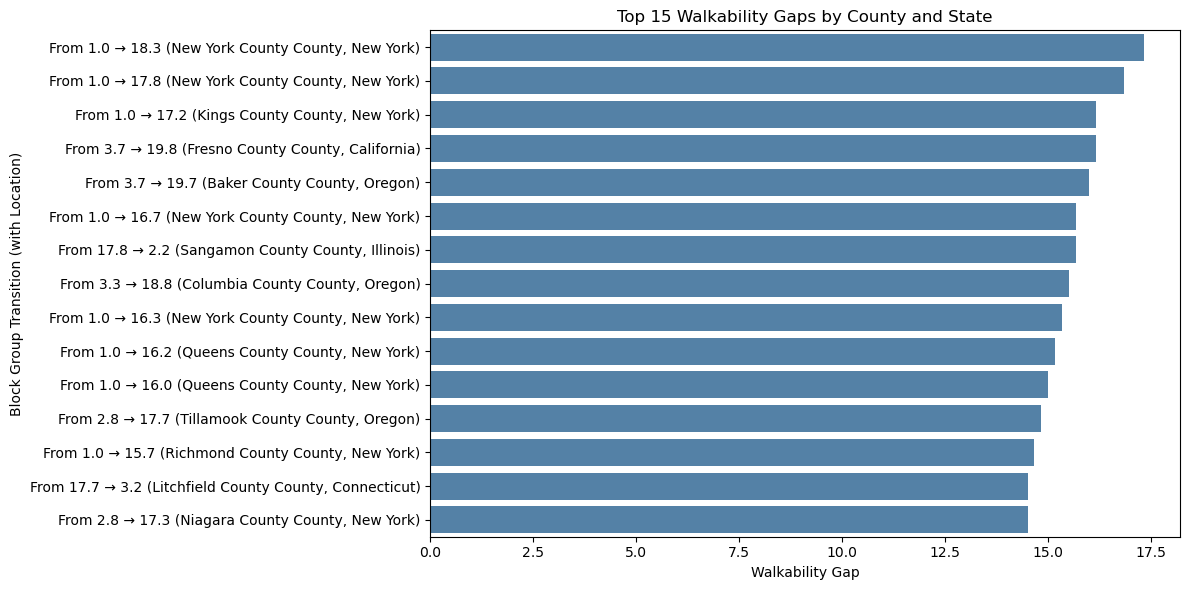

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and sort the top 15 gaps
top_gaps = gap_df.sort_values(by="Walkability_Gap", ascending=False).head(15).copy()

# Create a readable label
top_gaps['label'] = (
    "From " + top_gaps['NatWalkInd'].round(1).astype(str) +
    " → " + top_gaps['Next_NatWalkInd'].round(1).astype(str) +
    " (" + top_gaps['County_Name'].fillna("Unknown") + ", " +
    top_gaps['State_Name'].fillna("Unknown") + ")"
)

# Plot horizontal bar chart with a blue color
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_gaps,
    y='label',
    x='Walkability_Gap',
    color='steelblue'  # blue tone
)
plt.xlabel("Walkability Gap")
plt.ylabel("Block Group Transition (with Location)")
plt.title("Top 15 Walkability Gaps by County and State")
plt.tight_layout()
plt.show()


## 🔍 How to Interpret Walkability Gaps

A large walkability gap between two neighboring Census block groups — for example, **“From 2.8 → 17.3 (Fresno County, CA)”** — indicates a sharp contrast in how easily people can walk to destinations like stores, schools, parks, or transit.

In this example:
- One block group has a very **low walkability index** (2.8), meaning it likely lacks sidewalks, pedestrian infrastructure, or accessible amenities.
- The adjacent block group has a **very high index** (17.3), indicating a walkable, well-connected environment.

###  Why This Matters
Such large differences (typically **gaps > 10 points**) highlight potential **urban planning opportunities**. They may indicate:
- Physical barriers (e.g., highways, rail lines, zoning changes)
- Underserved neighborhoods next to highly walkable areas
- Infrastructure gaps that could be addressed with targeted investments

###  For City Planners
These locations are **prime candidates for intervention**, where adding:
- Sidewalks or pedestrian crossings
- Transit stops
- Bike paths or zoning improvements

could significantly improve walkability and equitable access across the community.

> Large walkability gaps help city planners identify **where walkability ends abruptly — and where it could be extended**.
